In [1]:
import numpy as np
from scipy import stats
from scipy import optimize as opt
from scipy.stats import beta, uniform 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
plt.style.use("ggplot")
np.random.seed(123)

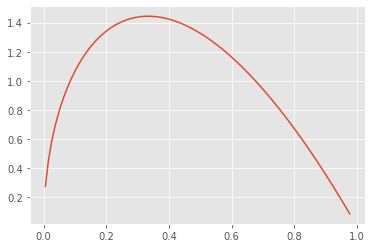

In [8]:
a, b = 1.5, 2.0
x = np.linspace(beta.ppf(0.001,a,b), beta.ppf(0.999,a,b), 100)
plt.plot(x, beta.pdf(x, a, b))

In [9]:
f = beta(a=a, b=b).pdf
res = opt.fmin(lambda x: -f(x), 0.3)
y_max = f(res)

Optimization terminated successfully.
         Current function value: -1.443376
         Iterations: 10
         Function evaluations: 20


In [10]:
y_max

array([1.44337567])

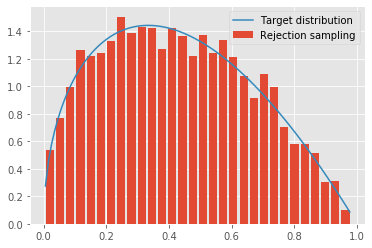

In [11]:
NMCS = 5000
x_mcs = uniform.rvs(size=NMCS)
r = uniform.rvs(size=NMCS) * y_max
accept = x_mcs[r <= f(x_mcs)]

plt.hist(accept, normed=True, bins=30, rwidth=0.8, label="Rejection sampling")
x = np.linspace(beta.ppf(0.001,a,b), beta.ppf(0.999,a,b), 100)
plt.plot(x, beta.pdf(x, a, b), label="Target distribution")
plt.legend()